In [1]:
import pandas as pd
import seaborn as sns
import warnings
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('./origin_data.csv')

## question null 값
- 486 -> 질문이 '2' ->직접 질문 넣음
- 799 -> 질문이 NaN -> 직접 질문넣음
- 1396 -> 질문이 '3' -> 직접 질문넣음 

In [3]:
tmp1=df.iloc[486]
tmp2=df.iloc[799]
tmp3=df.iloc[1396]

tmp1['question']='제240회 완주군의회 임시회에서 의회 관련 사항을 보고한 사람은 누구야?'
tmp2['question']='제98회 전라북도 완주군의회 임시회 회기 결정의 건에 대해 발의한 사람은 누구야?'
tmp3['question']='제 103회 전라북도 완주군의회 임시회 제1회 본회의의 휴회 기간은 언제야?'

df.iloc[486]=tmp1
df.iloc[799]=tmp2
df.iloc[1396]=tmp3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     1553 non-null   int64 
 1   document_id  1553 non-null   int64 
 2   question     1553 non-null   object
 3   answers      1553 non-null   object
 4   context      1553 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.8+ KB


# question 내의 "\n" 제거 ->10개당 1개 꼴

In [5]:
def remove_n(text):
    new_string = re.sub(r'\n', '', text)
    return new_string

# 데이터프레임에 길이관련 열 추가
## 미해결
- query_id
- answer 받으면 dict이아닌 str -> 이 파일안에선 eval로 해결

In [6]:
df['question']=df['question'].apply(lambda x: remove_n(x))
df['answers']=df['answers'].apply(lambda x:eval(x))
df['con_len'] = df['context'].apply(lambda x: len(x))
df['qu_len'] = df['question'].apply(lambda x: len(x))
df['ans_len']=[len((df['answers'][i])['text']) for i in range(len(df))]

In [7]:
question_mark_dict={1:'1 : When(term)',
                    2:'2 :When(date)',
                    3:'3 : Who(action)',
                    4:'4 : Who(role)',
                    5:'5 : Why(action)',
                    6:'6 : What(indicator)',
                    7:'7 : What(conference)'}

category_list=df['category']

for i in range(len(category_list)):
    for key in question_mark_dict.keys():
        if category_list[i]==key:
            category_list[i]=question_mark_dict[key]

df['category']=category_list

# 데이터의 형태

In [8]:
df.head(5)

,category,document_id,question,answers,context,con_len,qu_len,ans_len
0,1 : When(term),603489,제178회 완주군의회 임시회 회기는 언제로 결정됐어?,"{'answer_start': 144, 'text': '4월 20일부터 4월 27일...",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,29,21
1,3 : Who(action),603489,제178회 완주군의회 임시회 회기를 발의한 사람은 누구인가?,"{'answer_start': 119, 'text': '김상식 위원장 외 3인의 의원'}",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,33,16
2,7 : What(conference),604003,제7대 완주군의회 후반기 상임위원회 의원 선임건을 상정한 회의는 어떤거야?,"{'answer_start': 1, 'text': '제214회 완주군의회(임시회) ...",@제214회 완주군의회(임시회) 제1차 본 회 의 회 의 록@\n\n의석을 정돈하여...,908,41,26
3,4 : Who(role),604003,산업건설위원회 위원들은 누구인가?,"{'answer_start': 656, 'text': '서남용 의원님, 윤수봉 의원...",@제214회 완주군의회(임시회) 제1차 본 회 의 회 의 록@\n\n의석을 정돈하여...,908,18,43
4,6 : What(indicator),603644,완주군의회 의원 의정활동비등 지급에 관한 조례중 개정조례안을 발의한 의원은 몇 명이야?,"{'answer_start': 435, 'text': '9인'}",@제109회 전라북도 완주군의회 (임시회) 제2호 본 회 의 회 의 록@\n\n의사...,1111,48,2


# EDA

## 분포

Text(0.5, 1.0, 'Frequency Answer Data')

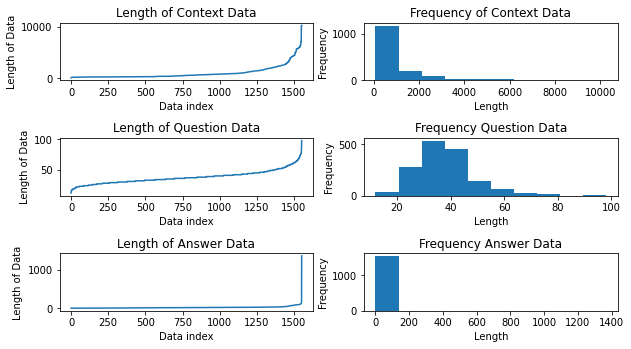

In [9]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.plot(sorted(df["con_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Context Data")

plt.subplot(3,2,2)
plt.hist(sorted(df["con_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Context Data")

plt.subplot(3,2,3)
plt.plot(sorted(df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Question Data")

plt.subplot(3,2,4)
plt.hist(sorted(df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency Question Data")

plt.subplot(3,2,5)
plt.plot(sorted(df["ans_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Answer Data")

plt.subplot(3,2,6)
plt.hist(sorted(df["ans_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency Answer Data")

Text(0.5, 1.0, 'Density of answer length')

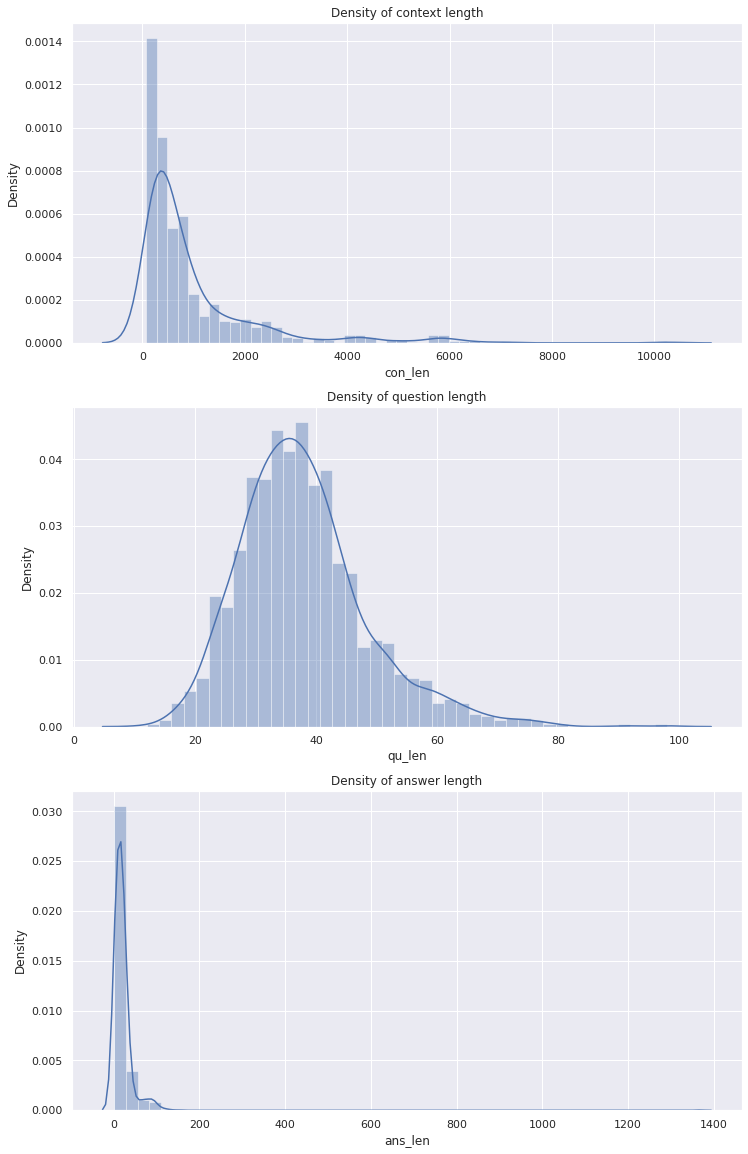

In [17]:
# train data 길이 시각화
fig, axes = plt.subplots(3, 1, figsize=(12, 20))

g = sns.distplot(df['con_len'], ax=axes[0])
# g = sns.violinplot(data=train_df, x='con_len', ax=ax)
axes[0].set_xlabel(g.get_xlabel(), fontsize=12)
axes[0].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[0].set_title('Density of context length')


g = sns.distplot(df['qu_len'], ax=axes[1])
axes[1].set_xlabel(g.get_xlabel(), fontsize=12)
axes[1].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[1].set_title('Density of question length')


g = sns.distplot(df['ans_len'], ax=axes[2])
axes[2].set_xlabel(g.get_xlabel(), fontsize=12)
axes[2].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[2].set_title('Density of answer length')

# `우리가 수행한 MRC 태스크와 유사!`
[MRC 대회에서 수행했던 EDA](https://github.com/boostcampaitech3/level2-mrc-level2-nlp-09/blob/master/EDA/EDA_tokenizer.ipynb)

## 통계치

In [10]:
df[["con_len","qu_len","ans_len"]].describe()

,con_len,qu_len,ans_len
count,1553.000000,1553.000000,1553.000000
mean,986.396008,37.855763,20.446233
std,1244.264133,10.542797,39.204327
min,78.000000,12.000000,1.000000
25%,274.000000,31.000000,7.000000
50%,539.000000,37.000000,16.000000
75%,1054.000000,43.000000,23.000000
max,10253.000000,98.000000,1367.000000


## 결측치

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     1553 non-null   object
 1   document_id  1553 non-null   int64 
 2   question     1553 non-null   object
 3   answers      1553 non-null   object
 4   context      1553 non-null   object
 5   con_len      1553 non-null   int64 
 6   qu_len       1553 non-null   int64 
 7   ans_len      1553 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 97.2+ KB


## 중복

In [12]:
print(f"카테고리 수 : {df['category'].nunique()}")
print(f"unique cocument_id 수 : {df['document_id'].nunique()}")
print(f"unique context 수 : : {df['context'].nunique()}")

카테고리 수 : 7
unique cocument_id 수 : 859
unique context 수 : : 859


# 카테고리

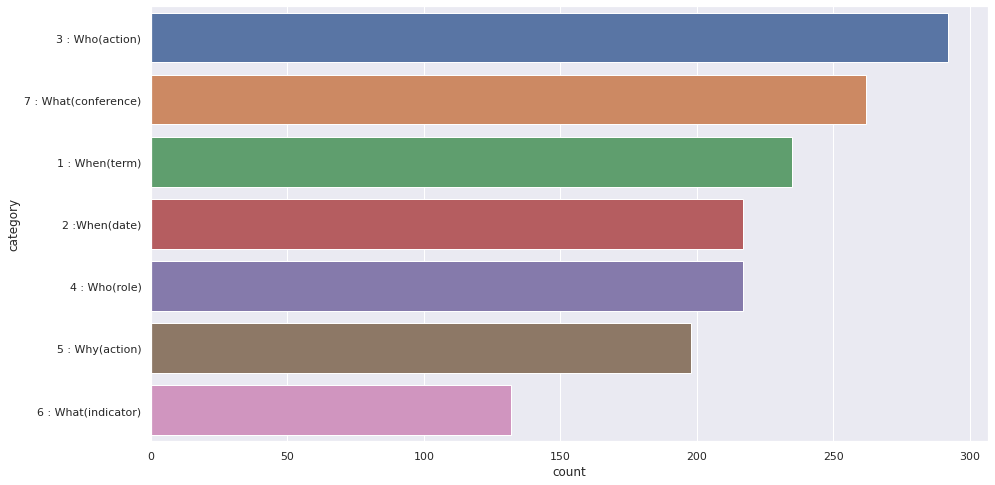

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)

![korquad](https://user-images.githubusercontent.com/46811558/169752414-9afcfaf2-edd6-4d54-8ba8-bf34a2d2b335.png)

In [14]:
category_df=pd.DataFrame()
column_list=['의문사','질문 패턴','답변 유형']
mark_list=['When(기간)','When(일시)','Who(능동주, 행동)','Who(피동주, 역할)','Why(행동, 의견)','What(지표)','What(회의)']
answer_list=['기간(날짜, 시간)','일시(날짜, 시간)','사람(들)','사람','명사구/기타','숫자(금액, 단위)','명사구']
qu_list=['<사건>의 기간은?','<사건>는 언제 진행되는가?','<행동>을 수행한 사람은 누구인가?','<역할>을 맡게된 사람은 누구인가?','<행동>을 한 이유는 무엇인가?','<사건>의 나온 <지표>는 얼마인가?','<사건>를 다루고 있는 회의는?']

In [15]:
category_df[column_list[0]]=mark_list
category_df[column_list[1]]=qu_list
category_df[column_list[2]]=answer_list

category_df.index=category_df.index + 1
category_df['count']=list(df['category'].value_counts().sort_index())

In [16]:
category_df

,의문사,질문 패턴,답변 유형,count
1,When(기간),<사건>의 기간은?,"기간(날짜, 시간)",235
2,When(일시),<사건>는 언제 진행되는가?,"일시(날짜, 시간)",217
3,"Who(능동주, 행동)",<행동>을 수행한 사람은 누구인가?,사람(들),292
4,"Who(피동주, 역할)",<역할>을 맡게된 사람은 누구인가?,사람,217
5,"Why(행동, 의견)",<행동>을 한 이유는 무엇인가?,명사구/기타,198
6,What(지표),<사건>의 나온 <지표>는 얼마인가?,"숫자(금액, 단위)",132
7,What(회의),<사건>를 다루고 있는 회의는?,명사구,262


# EDA Tokenizer

In [20]:
from transformers import AutoModel, AutoTokenizer
# from train import *

MODEL_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [30]:
df['con_tok_len'] = df['context'].apply(lambda x: len(tokenizer.tokenize(x)))
df['qu_tok_len'] = df['question'].apply(lambda x: len(tokenizer.tokenize(x)))
df['ans_tok_len']=[len(tokenizer.tokenize(df['answers'][i]['text'])) for i in range(len(df))]

In [31]:
df.head(5)

,category,document_id,question,answers,context,con_len,qu_len,ans_len,con_tok_len,qu_tok_len,ans_tok_len
0,1 : When(term),603489,제178회 완주군의회 임시회 회기는 언제로 결정됐어?,"{'answer_start': 144, 'text': '4월 20일부터 4월 27일...",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,29,21,124,16,14
1,3 : Who(action),603489,제178회 완주군의회 임시회 회기를 발의한 사람은 누구인가?,"{'answer_start': 119, 'text': '김상식 위원장 외 3인의 의원'}",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,33,16,124,18,8
2,7 : What(conference),604003,제7대 완주군의회 후반기 상임위원회 의원 선임건을 상정한 회의는 어떤거야?,"{'answer_start': 1, 'text': '제214회 완주군의회(임시회) ...",@제214회 완주군의회(임시회) 제1차 본 회 의 회 의 록@\n\n의석을 정돈하여...,908,41,26,470,21,16
3,4 : Who(role),604003,산업건설위원회 위원들은 누구인가?,"{'answer_start': 656, 'text': '서남용 의원님, 윤수봉 의원...",@제214회 완주군의회(임시회) 제1차 본 회 의 회 의 록@\n\n의석을 정돈하여...,908,18,43,470,10,26
4,6 : What(indicator),603644,완주군의회 의원 의정활동비등 지급에 관한 조례중 개정조례안을 발의한 의원은 몇 명이야?,"{'answer_start': 435, 'text': '9인'}",@제109회 전라북도 완주군의회 (임시회) 제2호 본 회 의 회 의 록@\n\n의사...,1111,48,2,576,28,2


Text(0.5, 1.0, 'Density of tokenized answer length')

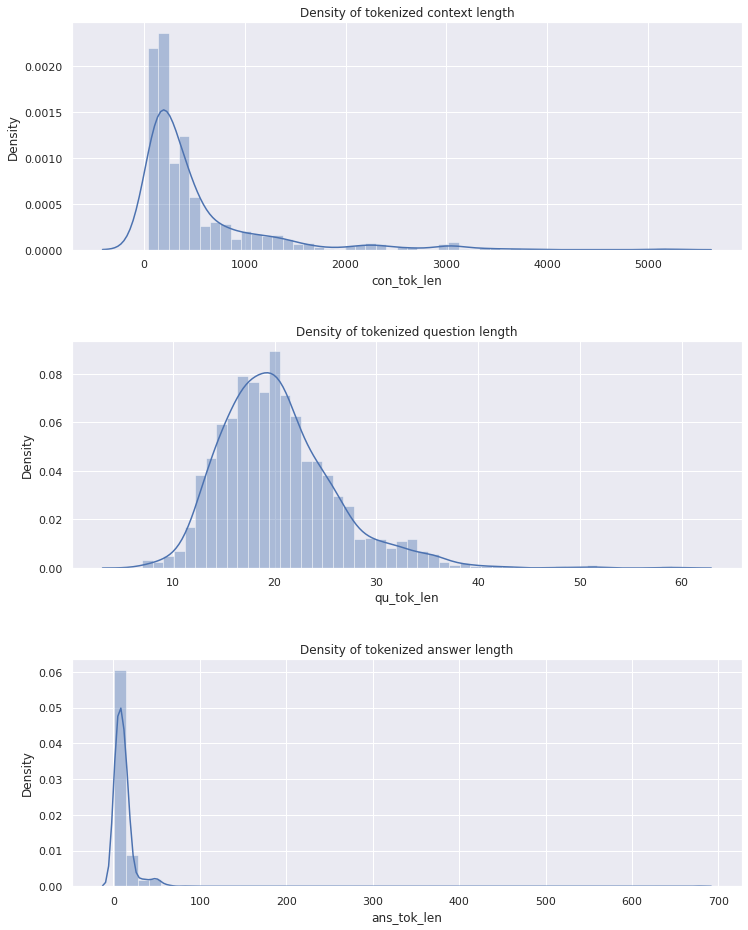

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

g = sns.distplot(df['con_tok_len'], ax=axes[0])
axes[0].set_xlabel(g.get_xlabel(), fontsize=12)
axes[0].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[0].set_title('Density of tokenized context length')


g = sns.distplot(df['qu_tok_len'], ax=axes[1])
axes[1].set_xlabel(g.get_xlabel(), fontsize=12)
axes[1].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[1].set_title('Density of tokenized question length')

g = sns.distplot(df['ans_tok_len'], ax=axes[2])
axes[2].set_xlabel(g.get_xlabel(), fontsize=12)
axes[2].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[2].set_title('Density of tokenized answer length')

## 통계치

In [38]:
df.describe()

,document_id,con_len,qu_len,ans_len,con_tok_len,qu_tok_len,ans_tok_len
count,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000
mean,603888.685769,986.396008,37.855763,20.446233,519.541533,20.334192,11.486156
std,235.518066,1244.264133,10.542797,39.204327,651.953902,5.651017,19.795930
min,603471.000000,78.000000,12.000000,1.000000,40.000000,7.000000,1.000000
25%,603700.000000,274.000000,31.000000,7.000000,144.000000,17.000000,4.000000
50%,603872.000000,539.000000,37.000000,16.000000,284.000000,20.000000,9.000000
75%,604078.000000,1054.000000,43.000000,23.000000,543.000000,23.000000,14.000000
max,604331.000000,10253.000000,98.000000,1367.000000,5176.000000,59.000000,678.000000


# 멘토님께서 제안하신 answer의 위치 -> max_seq_length,max_answer_length,doc_stride의 근거

### Tokenize 전

In [53]:
df_answer=df[['category','document_id','question','answers','context','con_len','ans_len']]
df_answer['ans_start']=[df_answer['answers'][i]['answer_start'] for i in range(len(df_answer))]
df_answer['ans_finish']=[df_answer['answers'][i]['answer_start']+len(df_answer['answers'][i]['text']) for i in range(len(df_answer))]
df_answer['ans_middle']=(df_answer['ans_start']+df_answer['ans_finish'])/2
df_answer['ans_ratio']=df_answer['ans_middle']/df_answer['con_len']

In [63]:
df_answer.head(5)

,category,document_id,question,answers,context,con_len,ans_len,ans_start,ans_finish,ans_middle,ans_ratio
0,1 : When(term),603489,제178회 완주군의회 임시회 회기는 언제로 결정됐어?,"{'answer_start': 144, 'text': '4월 20일부터 4월 27일...",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,21,144,165,154.5,0.638430
1,3 : Who(action),603489,제178회 완주군의회 임시회 회기를 발의한 사람은 누구인가?,"{'answer_start': 119, 'text': '김상식 위원장 외 3인의 의원'}",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,16,119,135,127.0,0.524793
2,7 : What(conference),604003,제7대 완주군의회 후반기 상임위원회 의원 선임건을 상정한 회의는 어떤거야?,"{'answer_start': 1, 'text': '제214회 완주군의회(임시회) ...",@제214회 완주군의회(임시회) 제1차 본 회 의 회 의 록@\n\n의석을 정돈하여...,908,26,1,27,14.0,0.015419
3,4 : Who(role),604003,산업건설위원회 위원들은 누구인가?,"{'answer_start': 656, 'text': '서남용 의원님, 윤수봉 의원...",@제214회 완주군의회(임시회) 제1차 본 회 의 회 의 록@\n\n의석을 정돈하여...,908,43,656,699,677.5,0.746145
4,6 : What(indicator),603644,완주군의회 의원 의정활동비등 지급에 관한 조례중 개정조례안을 발의한 의원은 몇 명이야?,"{'answer_start': 435, 'text': '9인'}",@제109회 전라북도 완주군의회 (임시회) 제2호 본 회 의 회 의 록@\n\n의사...,1111,2,435,437,436.0,0.392439


(array([374., 158., 116., 162., 218., 193., 116.,  47., 120.,  49.]),
 array([8.67453158e-05, 9.95989088e-02, 1.99111072e-01, 2.98623236e-01,
        3.98135399e-01, 4.97647563e-01, 5.97159726e-01, 6.96671889e-01,
        7.96184053e-01, 8.95696216e-01, 9.95208380e-01]),
 <a list of 10 Patch objects>)

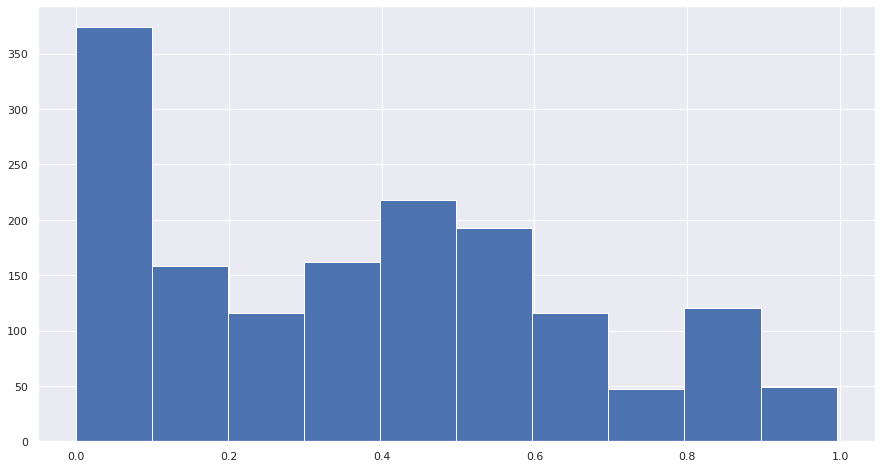

In [62]:
plt.hist(df_answer['ans_ratio'].sort_values())

### Tokenizer 이후 --> answer_start가 없으니 모르겠음..

In [65]:
df.head(3)

,category,document_id,question,answers,context,con_len,qu_len,ans_len,con_tok_len,qu_tok_len,ans_tok_len
0,1 : When(term),603489,제178회 완주군의회 임시회 회기는 언제로 결정됐어?,"{'answer_start': 144, 'text': '4월 20일부터 4월 27일...",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,29,21,124,16,14
1,3 : Who(action),603489,제178회 완주군의회 임시회 회기를 발의한 사람은 누구인가?,"{'answer_start': 119, 'text': '김상식 위원장 외 3인의 의원'}",@제178회 완주군의회(임시회) 제 1 차 본회의회의록@\n\n의사일정...,242,33,16,124,18,8
2,7 : What(conference),604003,제7대 완주군의회 후반기 상임위원회 의원 선임건을 상정한 회의는 어떤거야?,"{'answer_start': 1, 'text': '제214회 완주군의회(임시회) ...",@제214회 완주군의회(임시회) 제1차 본 회 의 회 의 록@\n\n의석을 정돈하여...,908,41,26,470,21,16
